### Our Mission

在本课中，你了解了许多模型性能的评估技术。这个notebook的目标是为你提供一些与分类特别相关的指标的练习。基于此目标，我们将再次查看之前课程中的垃圾邮件数据集。

首先，运行下面的单元格，准备数据并实例化多个不同的模型。

In [1]:
# Import our libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import tests as t

# Read in our dataset
df = pd.read_table('smsspamcollection/SMSSpamCollection',
                   sep='\t', 
                   header=None, 
                   names=['label', 'sms_message'])

# Fix our response value
df['label'] = df.label.map({'ham':0, 'spam':1})

# Split our dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'], 
                                                    random_state=1)

# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

# Instantiate a number of our models
naive_bayes = MultinomialNB()
bag_mod = BaggingClassifier(n_estimators=200)
rf_mod = RandomForestClassifier(n_estimators=200)
ada_mod = AdaBoostClassifier(n_estimators=300, learning_rate=0.2)
svm_mod = SVC()

/home/leon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: read_table is deprecated, use read_csv instead.
  app.launch_new_instance()


> **步骤 1**：现在，用适当的数据对上述的每个模型进行拟合。回答以下问题以确保你正确拟合模型。

In [2]:
# Fit each of the 4 models
# This might take some time to run
naive_bayes.fit(training_data, y_train)
bag_mod.fit(training_data, y_train)
rf_mod.fit(training_data, y_train)
ada_mod.fit(training_data, y_train)
svm_mod.fit(training_data, y_train)

/home/leon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [3]:
# The models you fit above were fit on which data?

a = 'X_train'
b = 'X_test'
c = 'y_train'
d = 'y_test'
e = 'training_data'
f = 'testing_data'

# Change models_fit_on to only contain the correct string names
# of values that you oassed to the above models

models_fit_on = {e,c} # update this to only contain correct letters

# Checks your solution - don't change this
t.test_one(models_fit_on)

That's right!  You need to fit on both parts of the data pertaining to training data!


> **步骤 2**：现在用你的模型对新数据进行预测，这将能检验模型的泛化能力。然后用正确的字符串给下面单元格中的集合对象赋值。

In [4]:
# Make predictions using each of your models
preds_nb = naive_bayes.predict(testing_data)
preds_bag = bag_mod.predict(testing_data)
preds_rf = rf_mod.predict(testing_data)
preds_ada = ada_mod.predict(testing_data)
preds_svm = svm_mod.predict(testing_data)

In [5]:
# Which data was used in the predict method to see how well your
# model would work on new data?

a = 'X_train'
b = 'X_test'
c = 'y_train'
d = 'y_test'
e = 'training_data'
f = 'testing_data'

# Change models_predict_on to only contain the correct string names
# of values that you oassed to the above models

models_predict_on = {f} # update this to only contain correct letters

# Checks your solution - don't change this
t.test_two(models_predict_on)

That's right! To see how well our models perform in a new setting, you will want to predict on the test set of data.


现在你已经设置好了所有的预测，让我们进入本课的主题 - 评估模型的性能。首先，我们将关注如何计算单个模型的指标，然后在本notebook的最后部分，你将要根据特定指标选择最合适的模型。

你将编写函数来计算很多指标，然后将其与用sklearn库计算的结果做比较。这将有助于你建立关于如何计算每个指标的直觉。

> **步骤 3**：请运行下面的单元格中的示例，以了解如何解决接下来的问题。请填写下面的函数来计算准确度，然后将你的答案与内置答案进行比较，以确保答案正确。

In [6]:
# accuracy is the total correct divided by the total to predict
def accuracy(actual, preds):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the accuracy as a float
    '''
    return np.sum(preds == actual)/len(actual)


print(accuracy(y_test, preds_nb))
print(accuracy_score(y_test, preds_nb))
print("Since these match, we correctly calculated our metric!")

0.9885139985642498
0.9885139985642498
Since these match, we correctly calculated our metric!


> **步骤4**：请填写下面的函数来计算精度，然后将你的答案与内置答案进行比较，以确保答案正确。

In [7]:
# precision is the true positives over the predicted positive values
def precision(actual, preds):
    '''
    INPUT
    (assumes positive = 1 and negative = 0)
    preds - predictions as a numpy array or pandas series 
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the precision as a float
    '''
    tp = len(np.intersect1d(np.where(preds==1), np.where(actual==1)))
    pred_pos = (preds==1).sum()
    return tp/(pred_pos)  # calculate precision here


print(precision(y_test, preds_nb))
print(precision_score(y_test, preds_nb))
print("If the above match, you got it!")

0.9720670391061452
0.9720670391061452
If the above match, you got it!


> **步骤5**：请填写下面的函数来计算召回率，然后将你的答案与内置答案进行比较，以确保答案正确。

In [8]:
# recall is true positives over all actual positive values
def recall(actual, preds):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the recall as a float
    '''
    tp = len(np.intersect1d(np.where(preds==1), np.where(actual==1)))
    act_pos = (actual==1).sum()
    return tp/(act_pos) # calculate recall here


print(recall(y_test, preds_nb))
print(recall_score(y_test, preds_nb))
print("If the above match, you got it!")

0.9405405405405406
0.9405405405405406
If the above match, you got it!


> **步骤6**：请填写下面的函数来计算f1 分数，然后将你的答案与内置答案进行比较，以确保答案正确。

In [9]:
# f1_score is 2*(precision*recall)/(precision+recall))
def f1(preds, actual):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the f1score as a float
    '''
    tp = len(np.intersect1d(np.where(preds==1), np.where(actual==1)))
    pred_pos = (preds==1).sum()
    act_pos = (actual==1).sum()
    
    precision = tp/(pred_pos) 
    recall = tp/(act_pos)
    return 2*precision*recall/(precision+recall) # calculate f1-score here


print(f1(y_test, preds_nb))
print(f1_score(y_test, preds_nb))
print("If the above match, you got it!")

0.9560439560439562
0.9560439560439562
If the above match, you got it!


> **步骤7**：现在你已经计算了许多不同的指标，让我们看一下如何从中选择一个合适的指标。请用将下列指标和字典中标识其适用情况的语句进行配对。

In [10]:
# add the letter of the most appropriate metric to each statement
# in the dictionary
a = "recall"
b = "precision"
c = "accuracy"
d = 'f1-score'


seven_sol = {
'We have imbalanced classes, which metric do we definitely not want to use?': c, # letter here,
'We really want to make sure the positive cases are all caught even if that means we identify some negatives as positives': a, # letter here,    
'When we identify something as positive, we want to be sure it is truly positive': b, # letter here, 
'We care equally about identifying positive and negative cases': d # letter here    
}

t.sol_seven(seven_sol)

That's right!  It isn't really necessary to memorize these in practice, but it is important to know they exist and know why might use one metric over another for a particular situation.


> **步骤8**：根据你现在对这些指标的理解，将模型与下面字典中的语句配对。

In [11]:
# use the answers you found to the previous questiona, then match the model that did best for each metric
a = "naive-bayes"
b = "bagging"
c = "random-forest"
d = 'ada-boost'
e = "svm"


eight_sol = {
'We have imbalanced classes, which metric do we definitely not want to use?': a, # letter here,
'We really want to make sure the positive cases are all caught even if that means we identify some negatives as positives': a, # letter here,    
'When we identify something as positive, we want to be sure it is truly positive': c, # letter here, 
'We care equally about identifying positive and negative cases': a, # letter here  
}

t.sol_eight(eight_sol)

That's right!  Naive Bayes was the best model for all of our metrics except precision!


In [12]:
# cells for work

In [13]:
# If you get stuck, also notice there is a solution available by hitting the orange button in the top left

In [14]:
def print_metrics(y_true, preds, model_name=None):
    '''
    INPUT:
    y_true - the y values that are actually true in the dataset (numpy array or pandas series)
    preds - the predictions for those values from some model (numpy array or pandas series)
    model_name - (str - optional) a name associated with the model if you would like to add it to the print statements 
    
    OUTPUT:
    None - prints the accuracy, precision, recall, and F1 score
    '''
    if model_name == None:
        print('Accuracy score: ', format(accuracy_score(y_true, preds)))
        print('Precision score: ', format(precision_score(y_true, preds)))
        print('Recall score: ', format(recall_score(y_true, preds)))
        print('F1 score: ', format(f1_score(y_true, preds)))
        print('\n\n')
    
    else:
        print('Accuracy score for ' + model_name + ' :' , format(accuracy_score(y_true, preds)))
        print('Precision score ' + model_name + ' :', format(precision_score(y_true, preds)))
        print('Recall score ' + model_name + ' :', format(recall_score(y_true, preds)))
        print('F1 score ' + model_name + ' :', format(f1_score(y_true, preds)))
        print('\n\n')


In [15]:
# Print Bagging scores
print_metrics(y_test, preds_bag, 'bagging')

# Print Random Forest scores
print_metrics(y_test, preds_rf, 'random forest')

# Print AdaBoost scores
print_metrics(y_test, preds_ada, 'adaboost')

# Naive Bayes Classifier scores
print_metrics(y_test, preds_nb, 'naive bayes')

# SVM Classifier scores
print_metrics(y_test, preds_svm, 'svm')

Accuracy score for bagging : 0.9748743718592965
Precision score bagging : 0.9120879120879121
Recall score bagging : 0.8972972972972973
F1 score bagging : 0.9046321525885558



Accuracy score for random forest : 0.9813352476669059
Precision score random forest : 1.0
Recall score random forest : 0.8594594594594595
F1 score random forest : 0.9244186046511628



Accuracy score for adaboost : 0.9770279971284996
Precision score adaboost : 0.9693251533742331
Recall score adaboost : 0.8540540540540541
F1 score adaboost : 0.9080459770114943



Accuracy score for naive bayes : 0.9885139985642498
Precision score naive bayes : 0.9720670391061452
Recall score naive bayes : 0.9405405405405406
F1 score naive bayes : 0.9560439560439562



Accuracy score for svm : 0.8671931083991385
Precision score svm : 0.0
Recall score svm : 0.0
F1 score svm : 0.0





/home/leon/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/leon/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


作为本练习的最后一步，让我们看看最后三个指标：f-beta 分数、 ROC 曲线和 AUC。

**f-beta 分数：** 如果你更关注精度，你应该让beta值接近零。如果你更关注召回率，你应该让beta值趋向无穷大。 

> **步骤9**：使用 fbeta_score 函数与使用 sklearn 库的其他指标类似，但你还要设置参数 beta 来控制精度和召回率的权重。请填写下面空格的代码，以表明你可以使用 sklearn 库的 [fbeta_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html) 函数来重现上面的 f1-score 函数的结果。未来你可能会尝试使用不同的权重，[这篇文章](http://mlwiki.org/index.php/Precision_and_Recall)很好地解释了如何根据不同的情况调整 beta。

In [16]:
# import fbeta_score
from sklearn.metrics import fbeta_score

# Show that you can produce the same f1_score results using fbeta_score
print(fbeta_score(y_test, preds_bag,beta=1))
print(f1_score(y_test, preds_bag))

0.9046321525885558
0.9046321525885558


> **步骤10**：用 Python 生成 ROC 曲线是一个非常独立的过程。我编写了下面的函数来帮助完成这个过程，也可以方便你将来使用。请尝试使用你在上面创建的其他分类器，把它们和下面的随机森林模型做比较，看有什么不同。

运行下面的单元格以构建 ROC 曲线，找出随机林模型的 AUC。

In [17]:
%matplotlib inline

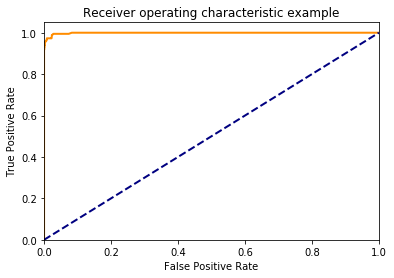

0.9432432432432433

In [18]:
# Function for calculating auc and roc

def build_roc_auc(model, X_train, X_test, y_train, y_test):
    '''
    INPUT:
    model - an sklearn instantiated model
    X_train - the training data
    y_train - the training response values (must be categorical)
    X_test - the test data
    y_test - the test response values (must be categorical)
    OUTPUT:
    auc - returns auc as a float
    prints the roc curve
    '''
    import numpy as np
    import matplotlib.pyplot as plt
    from itertools import cycle
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    from scipy import interp
    
    y_preds = model.fit(X_train, y_train).predict_proba(X_test)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(y_test)):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_preds[:, 1])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_preds[:, 1].ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.show()
    
    return roc_auc_score(y_test, np.round(y_preds[:, 1]))
    
    
# Finding roc and auc for the random forest model    
build_roc_auc(rf_mod, training_data, testing_data, y_train, y_test) 

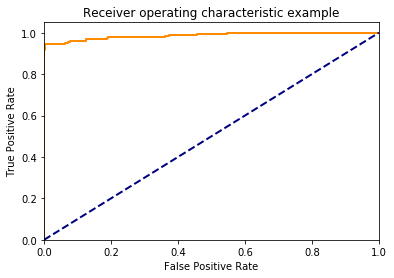

0.9682007338464294

In [19]:
# Your turn here - choose another classifier to see how it compares
build_roc_auc(naive_bayes, training_data, testing_data, y_train, y_test) 

